# MOOC Notes: Machine Learning With Python, IBM ML0101EN

## Module 1 - Introduction to Machine Learning
Machine learning is **a model that makes predictions without being explicitly coded to do so**. Previously, we used to have *sets of rules* that analysed features of a dataset, but this was both inefficient and inaccurate. Now, with ML, we can accurately forecast and predict trends from large datasets efficiently.

To clear up some of the jargon:

1. **Artificial intelligence** is the attempt to make computers perform cognitive, thought-out actions, without being explicitly coded to do so.
2. **Machine learning** is the statistical part of AI, that deals with forecasting and predicting.
3. **Deep learning** is a subset of ML that uses high level ML models to perform human-like actions or decisions.

Next, we need to know the difference between supervised and unsupervised models:

1. **Supervised learning** is when you use a model that is *trained using labelled data*, or in other words, you pass it labelled data. It comes in two types: **classification**, where you are predicting categorical data, and **regression**, where you are predicting continuous data.
2. **Unsupervised learning** is exactly the opposite, *trained using unlabelled data*, so the model doesn't know what it is looking for, but rather, it is corrected. Popular examples may include **clustering**, where you attempt to group together data to classify them, and more.

## Module 2 - Regression
Regression can be defined as **the process of predicting a continuous variable**. We can use keywords:
1. **X** or **features** of a dataset are the variables that we use to predict. Wherever there are multiple features, we call this *multiple regression*.
2. **Y** or **labels** are the variables that we aim to predict.
Regression can also be split into **linear** and **non-linear**, where linear is where the model you use to predict is a straight line and non-linear is where the medel is not straight.
Some examples of regression analysis are:
1. Sales forecasting, where you are predicting stocks.
2. Predicting the price of a house.
3. Calculating employment income to give to an employee.

### Simple Linear Regression
With linear regression, we aim to generalise a trend by drawing a straight line on a scatter graph, so we can predict by reading off of it. And the equation of the line would look something like this:

$\hat{y} = \theta\ _{0} + \theta\ _{1} x _{1}$

where $\hat{y}$ and $x _{1}$ are the feature and label of the dataset, and $\theta\ _{0}$ and $\theta\ _{1}$ are the parameters we need to adjust to change the line, or the coefficients of the linear equation. To know how to change these parameters, when we are training the model, we look at a specific data point. Then we compare its $y$ with the $y$ given by the line of best fit, or the $\hat{y}$, thus performing $y - \hat{y}$ for each point in the dataset. This calculation is called the **residual error**. Using sigma notation, and then taking the mean square of all of these errors, we calculate the **MSE - Mean Residual Error**:

$MSE = \frac{1}{n} \sum \limits_{i = 1}^{n} (y\ _{i}- \hat{y}\ _{i})^2$

The objective of linear regression is to *minimise this equation and thus find the best line of best fit*. The reason linear regression is so god for problems like this is that by calculating the MSE, or alternatively just solving for $\theta\ _{0}$ and $\theta\ _{1}$ using simple linear equation maths, you can make the model without having to tune parameters yourself. It's also very fast as you're just solving an equation for a set of inputs to find your answer or prediction.

### Model Evaluation
There are two ways of evaluating your model after you've built it:
1. **Train and test on the same dataset** - you train your model using the entire dataset, then test it using a prtion of unlabelled data, and modify by comparing your predictions with the actual values. This will most likely have a high training accuracy, but a low out-of-sample accuracy.
2. **Train-test split** - where you set aside a portion of your data only for testing.
Note that it is **not beneficial to have too high a training accuracy**, as this will result in an overfit of the data, meaning the model is too specific to the dataset, and not general enough to be accurate with out-of-sample data. By this fact, train-test splitting is much more accurate. However, this is highly dependent on the accuracy of the dataset itself. To solve this dependency, though, we use **K-fold cross-validation**, which is essentially where we make 4 models in parallel of teh same dataset, and split them differently for each fold. Then we take an average to produce a more consistent out-of-scope accuracy value.

### Evaluation Metrics
Earlier we used MSE, but there are many other metrics used to evaluate your linear regression model:
1. **MAE - Mean Absolute Error**: the easiest, as it is just an absolute of the error.

$MAE = \frac{1}{n} \sum \limits_{i = 1}^{n} |y\ _{i}- \hat{y}\ _{i}|$
2. **RMSE - Root Mean Absolute Error**: the root of MSE so that it is more relatable to the unit values of the labels.

$RMSE = \sqrt{\frac{1}{n} \sum \limits_{i = 1}^{n} (y\ _{i}- \hat{y}\ _{i})^2}$
3. **RAE - Relative Absolute Error**: where your whole error is divided by the error compared to the mean of your dataset, hence more relative.

$RAE = \frac{\sum \limits_{i = 1}^{n} |y\ _{i}- \hat{y}\ _{i}|}{\sum \limits_{i = 1}^{n} |y\ _{i}- \bar{y}\ _{i}|} $
4. **RSE - Relative Squared Error**: the same as RAE, but using squaring instead of absolute errors.

$RSE = \frac{\sum \limits_{i = 1}^{n} (y\ _{i}- \hat{y}\ _{i})^2}{\sum \limits_{i = 1}^{n} (y\ _{i}- \bar{y}\ _{i})^2} $
5. **R Squared - $R^2$**: not an error metric, but used to show how accurate your model is on the whole.

$R ^ 2 = 1 - RSE$

### Regression Lab

#### Importing Needed Packages

In [2]:
# Importing packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

# Making plots inline in Jupyter
%matplotlib inline

#### Looking at the Dataset

Our dataset, `FuelConsumption.csv`, is a fuel consumption dataset that contains the following attributes:

- MODELYEAR
- MAKE
- MODEL
- VEHICLE CLASS
- ENGINE SIZE
- CYLINDERS
- TRANSMISSION
- FUEL CONSUMPTION in CITY
- FUEL CONSUMPTION in HWY
- FUEL CONSUMPTION in COMB
- CO2 EMISSIONS

#### Reading the Dataset

In [3]:
# Reading
df = pd.read_csv("FuelConsumptionCo2.csv")

# Looking at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Exploring the Data

Here we describe our dataset with a bunch of means and quartiles.

In [4]:
# Summarizing
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Now we'll select certain features, isolate them, and then plot them.

In [5]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


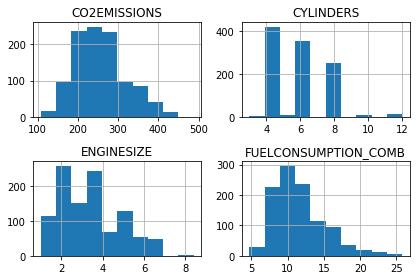

In [6]:
plot1 = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
plot1.hist()
plt.tight_layout()
plt.show()

Now we plot the features against EMISSION, to assess how linear the relations are.

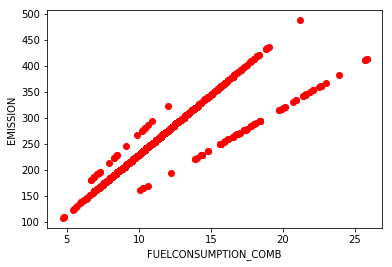

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="red")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("EMISSION")
plt.show()

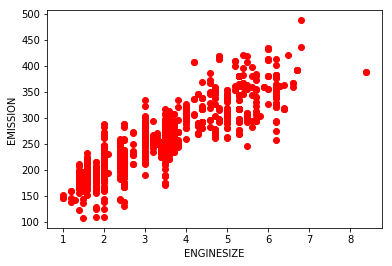

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSION")
plt.show()

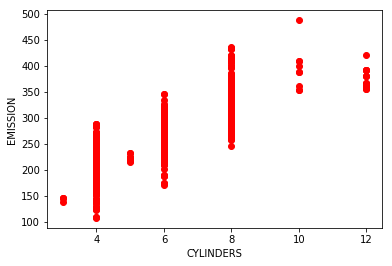

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="red")
plt.xlabel("CYLINDERS")
plt.ylabel("EMISSION")
plt.show()

#### Splitting the Data
It is quite common to use 80% of the data for training, and 20% for training, so we will split like so here. We must also do so randomly, so we will create a mask to select random observations.

In [10]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

#### Creating the Model
First, let's plot our training data:

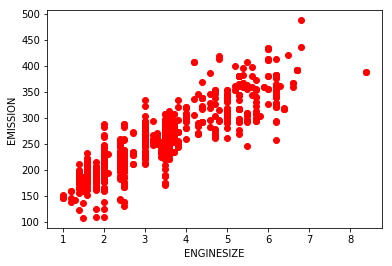

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSION")
plt.show()

Now, let's use the `sklearn` module to train out model.

In [12]:
from sklearn import linear_model

regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regression.fit(train_x, train_y)

print("Coefficient: ", regression.coef_[0])
print('Intercept: ', regression.intercept_)

Coefficient:  [39.16851094]
Intercept:  [124.75537765]


Now we can plot our line over the scatter graph to check:

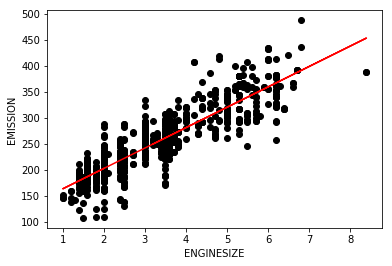

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "black")
plt.plot(train_x, regression.coef_[0][0]*train_x + regression.intercept_[0], '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSION")

plt.show()

#### Evaluating our Model
Now we can import `sklearn`'s `r2_score` module to use $R^2$.

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regression.predict(test_x)

MAE = np.mean(np.absolute(test_y - test_y_hat))
MSE = np.mean((test_y_hat - test_y) ** 2)
R2 = r2_score(test_y_hat, test_y)

print("MAE: %.2f" % MAE)
print("MSE: %.2f" % MSE)
print("R2: %.2f" % R2)

MAE: 24.65
MSE: 1002.55
R2: 0.63


### Multiple Linear Regression
Multiple linear regression is usually used as opposed to simple linear regression when you are attempting to find out how much of an effect one feature has on the label. It is the same as simple regression, except $\hat{y}$ is calculated by the following:

$\hat{y} = \theta ^ TX$

where $\theta$ is the horizontal vector of all coefficient values, and $X$ is the vertical vector of all features, plus a 1 for the intercept at the start. The product is a dot product.

The evaluation metrics are roughly the same, but calculating the coefficients is different, because we now have multiple features instead of just one. There are 2 popular methods for doing so:
1. **Ordinary Least Squares** - uses linear algebra to calculate estimates for the coefficients. However, this is not viable for datasets with observations past 10,000 as it's very slow at that point.
2. **Optimisation Methods** - attempt to minimise the evaluation metric. For example, *gradient descent* starts off with random coefficient values, then modifies them to minimise the MSE.
Predicting is the same, as we can plug in x values to get predictions from the equations we derive. The higher the coefficient, the more important the variable is to predicting the labels. Understand that **adding too many unnecessary variables may result in an overfit model, and low out-of-scope accuracy**, which we don't want. You can avoid this by making sure that **all features you use have a linear relationship with the label**.

#### Importing Necessary Libraries

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

%matplotlib inline

#### Training the Model
Here we will use the same dataset, and the code is virtually the same, but you pass an array of features instead of one to the `fit()` function.

In [17]:
from sklearn import linear_model

df = pd.read_csv("FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

regression = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(x, y)

y_hat = regression.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
variance = regression.score(x, y)
print(variance)

0.8800234072064305


#### Variance
Just to explain the `variance` variable above, variance is:

$Variance = 1 - \frac{Y - \hat{Y}}{Y}$

where $Y$ signifies a vector for all the actual labels from the dataset and $\hat{Y}$ is a vector for all the predictions.